# Lab 4: Deep Learning : Programmation neurone artificiel - 2 couches

#### Structure du code

Pour écrire notre programme de réseaux de neurones, nous allons repartir du code qui nous avait permis d'entraîner un modèle de neurones artificiels

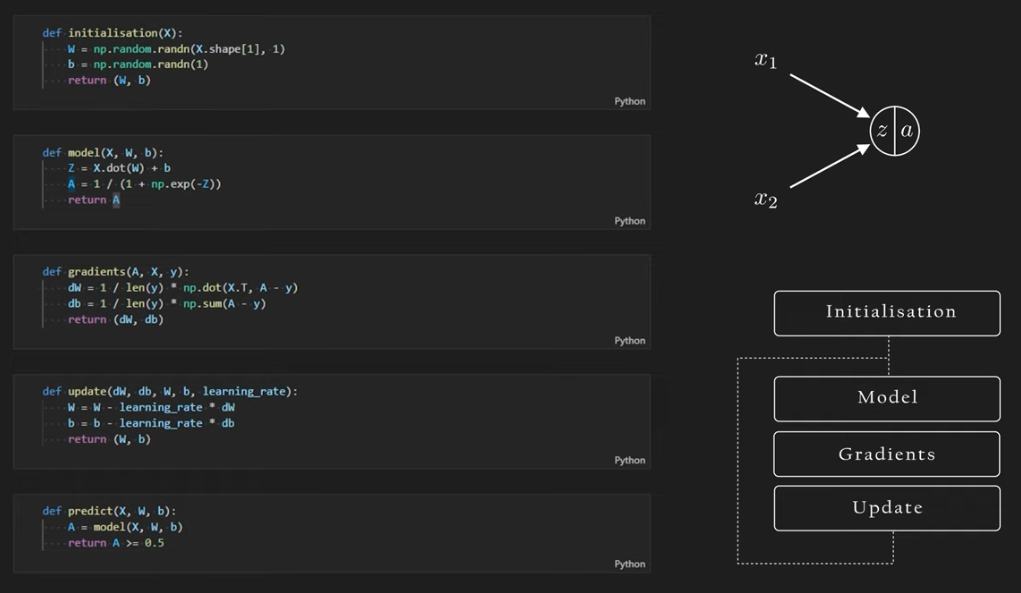

car en réalité ces deux programmes vont suivre exactement la même structure. La seule différence entre les deux, c'est qu'au lieu d'avoir un seul neurone dans une seule couche et bien nous avons cette fois ci plusieurs neurones répartis en deux couches,

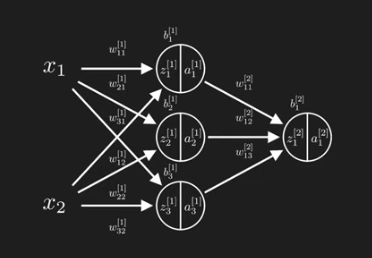

cela fait que nos fonctions vont être un tout petit peu différente. En effet, au lieu d'avoir simplement $W$ et $B$ dans notre fonction d'initialisation, nous allons avoir quatre paramètres $W^{[1]}$, $b^{[1]}$ et $W^{[2]}$,  $b^{[2]}$. 

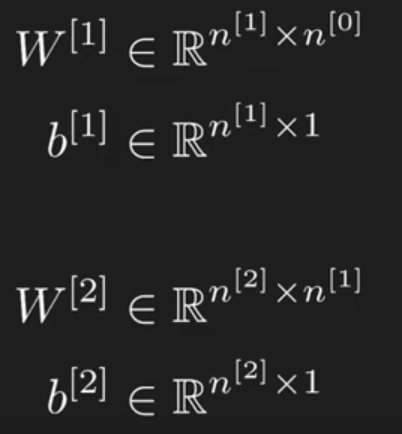

De même pour la fonction du modèle, au lieu d'avoir simplement $Z$  et $A$, nous allons avoir $Z^{[1]}$, $A^{[1]}$ et $Z^{[2]}$, $A^{[2]}$. 

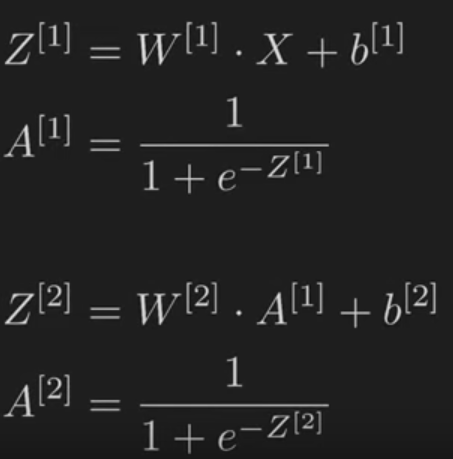

In [363]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

#### 1. Fonction d'initialisation

Comment modifier notre fonction d'initialisation pour pouvoir cette fois ci l'utiliser pour un réseau de neurones à deux couches. On va dire cette fois ci que $W1$ est de  dimensions $(n1, n0)$ 

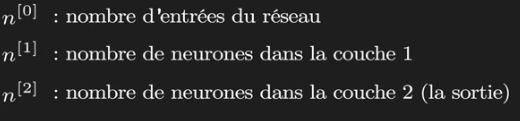

Alors ce $n1$ et ce $n0$ on va donc les faire passer en tant que paramètres. $b1$ est quant à lui de dimensions $(n1,1)$. Ca c'est donc pour les paramètres de la première couche. 

Et ensuite, il nous faut initialiser les paramètres de la deuxième couche $W2$ de dimension $(n2,n1)$ et $b2$ est de dimension $(n2,1)$. On va à notre liste de paramètres $n2$.  

Maintenant pour retourner ces différents paramètres, nous allons scellé tous ces paramètres dans un dictionnaire qu'on peut par exemple appeler **parametres{}**. Et de retourner ce dictionnaire, ce qui nous permettra par la suite de manipuler uniquement ce conteneur dans tout le reste de notre code.

In [364]:
def initialisation(n0, n1, n2):

    W1 = np.random.randn(n1, n0)
    b1 = np.zeros((n1, 1))
    W2 = np.random.randn(n2, n1)
    b2 = np.zeros((n2, 1))

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres

#### 2. Fonction model - forward_propagation()

Maintenant, passons à notre fonction de modèle qu'on pourrait peut-être nommé en **forward_propagation()**, puisque c'est vraiment le terme qu'on utilise en Deep-Learning. Alors, dans cette fonction on faisait autrefois passer nos données $X$ ainsi que les paramètres $W$ et $b$, sauf qu'à présent nous avons un dictionnaire qui contient nos différents paramètres. Donc on va faire passer ce dictionnaire à la place. 

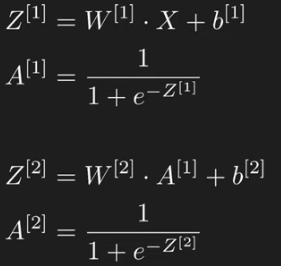

Alors, dans cette fonction on cherche donc à calculer $Z1$, $A1$ et $Z2$, $A2$. On va venir chercher nos coefficients et biais dans notre dictionnaire paramètres.

Pour finir notre Forward-Propagation, il faut donc qu'on retourne l'activation à la sortie de notre neuronne, donc l'activation $A2$. Cependant on va pas se contenter de retourner uniquement cette activation parce qu'en réalité on aura également besoin de l'activation $A1$ pour calculer les gradients lors de la Back-Propagation. 

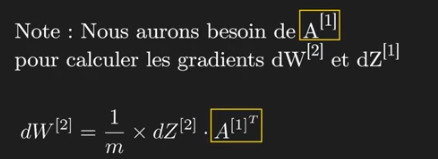

Donc ici on peut retourner si on veut un tupple qui contient nos différentes activation en les plaçant dans un dictionnaire que l'on retourne 

In [365]:
def forward_propagation(X, parametres):

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))

    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))

    activations = {
        'A1': A1,
        'A2': A2
    }

    return activations

#### 3. Fonction de gradient : back_propagation()

Maintenant qu'on a fait tout ça, nous allons enfin pouvoir passer à la fonction des gradients qu'on va pouvoir ici renommer en **back_propagation()**. 

Dans cette fonction nous allons calculer $dZ2$, $dW2$, $db2$ et ensuite $dZ1$, $dW1$,  $db1$. 

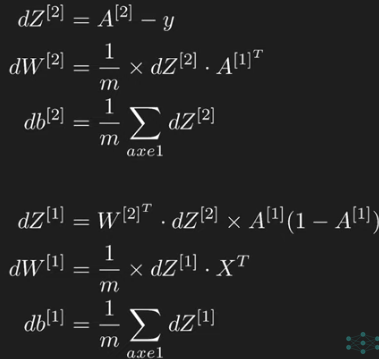

Alors pour ça, si on jette un coup d'oeil à nos formules on voit qu'on va avoir besoin de $A2$ , $y2$ , $A1$, $W2$ et de $X$. 

Donc avant de se lancer dans les calculs, nous allons nous assurer qu'on est bien accès à ces différentes valeurs en les passant dans notre fonction. On a donc $X$, $y$ ainsi que le **dictionnaire des activations** pour pouvoir extraire $A1$ et $A2$ et le dictionnaire paramètres pour pouvoir extraire $W2$. 

Une fois que nous avons extrait ces différentes valeurs, nous pouvons nous lancer dans nos calculs.

Alors on va commencer par $dZ2$. Ensuite, nous avons $dW2$ où $m$ c'est le nombre de données que l'on a dans notre Dataset,  autrement dit m c'est égal à **shape[1]** et oui car comme on l'avait vu dans la septième leçon de cette série, lorsqu'on travaille avec des réseaux de neurones, on a tendance à transposer la matrice $X$ est le vecteur $y$. 

Maintenant db2, c'est égal à $1/m$ x la somme des colonnes de $dZ2$, donc on va écrire **axis égal à 1** dans tout ça on va aussi rajouter $keepdims=Tue$, ce qui va nous permettre de conserver un tableau $db2$ à deux dimensions. Ca c'est très important parce que tout à l'heure lors ce qu'on mettra à jour nos gradient en disant que $b2$ est égal à $b2$ moins le **learning_rate** fois le gradient $db2$. Si $db2$ est de dimension $n2$ et que $b2$ est de dimensions $(n2,1)$, on va obtenir des résultats assez étrange à cause du phénomène de **broadcasting**. 

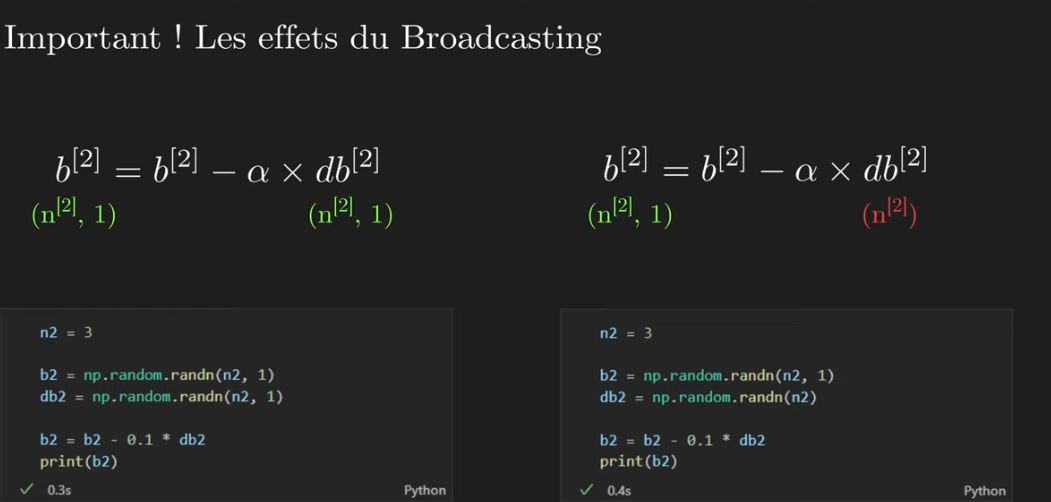

In [366]:
def back_propagation(X, y, parametres, activations):

    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parametres['W2']

    m = y.shape[1]

    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims = True)

    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims = True)

    gradients = {
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }
    
    return gradients

#### 4. Fonction update

Pour finir, il ne reste plus qu'à modifier notre fonction **update()**. Alors cette fonction, elle a normalement pour but de modifier les paramètres $W$ et $b$. Mais là, comme nous avons quatre paramètres, on va modifier $W1$, $b1$ et $W2$, $b2$. 

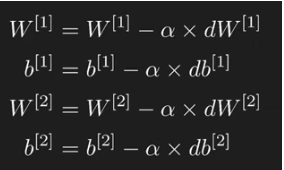


In [367]:
def update(gradients, parametres, learning_rate):

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres

#### 5. Fonction predict

Pour finir, il ne reste plus qu'à modifier notre fonction de prédiction dans laquelle on fait passer donc nos paramètres, ce qui nous permet d'effectuer la **forward_propagation()** et cela nous retourne, d'après notre définition de tout à l'heure, un dictionnaire d'activation duquel on peut extraire l'activation final, donc $A2$ et on retourne tout simplement 1 lorsque $A2$ est supérieur à 0.5 et sinon on retourne 0 tout simplement. 

In [368]:
def predict(X, parametres):
  activations = forward_propagation(X, parametres)
  A2 = activations['A2']
  return A2 >= 0.5

6. Fonction Finale

Et voilà, avec ça nous avons désormais toutes les fonctions nécessaires pour entraîner un réseau de neurones à deux couches. 

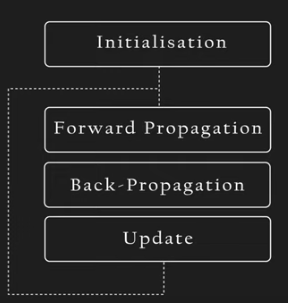

Maintenant il ne reste plus qu'à assembler toutes ses fonctions au sein de l'algorithme de la descente de gradient donc pour ça dans la cinquième leçon de cette série nous avions créé une fonction **artificial_neuron()**, qu'on va ici renommée en **neural_network()**. Dans cette fonction, on commence par initialiser nos paramètres mais attention cette fois ci, nous n'avons pas des paramètres $W$ et $b$, mais nous avons un dictionnaire de paramètres donc il va falloir corriger tout ça.  Puis nous avons **une boucle for** dans laquelle on va effectuer notre **forward_propagation()** et notre **back-propagation()**et notre **update()**. 

Pour effectuer notre initialisation, d'après la fonction qu'on a créé tout à l'heure, il nous faut trois valeurs $n0$, $n1$ et $n2$. 

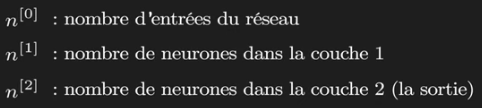

Alors, $n0$ c'est le nombre de variables que l'on a dans $X$ où $X_{train}$  étant donné que notre matrice va être transposée

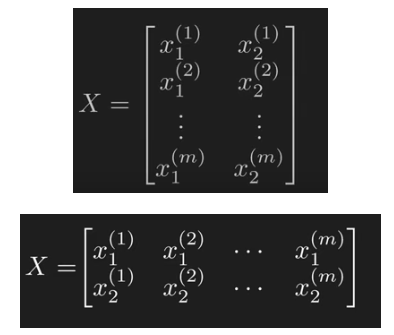

C'est ce que je vous avais expliqué dans la septième leçon de cette série, on dit que $n0$ est égal à $X_{train}.shape[0]$ de la même manière $n2$ est égal à $y_{train}.shape[0]$ et pourrait $n1$, c'est simplement le nombre de neurones qu'on désire avoir dans notre première couche. Pour ça, on va créer une entrée $n1$ que vous pourrez choisir.

Donc avec ça, nous avons désormais un dictionnaire qui peut contenir nos différents paramètres. 

Maintenant, nous pouvons passer à notre descente de gradient. Donc pendant **n_itération**, on va d'abord faire notre **forward_propagation()**, dans laquelle on doit passer **X_train** ainsi que les différents paramètres du modèle et ceci nous **retourne des activations**. Ensuite, on effectue notre **back_propagation()** en faisant passer **X_train**, $y_train$ ainsi que le dictionnaire des activations et le dictionnaire des paramètres. Et cela nous retourne des gradients. Et pour finir c'est gradient on s'en sert pour mettre à jour notre modèle avec les gradients et les paramètres. 

Le reste c'est simplement de quoi visualiser nos courbes d'apprentissage. Donc tous les dix itération on va rajouter le **loss** dans une liste initialement vide. Donc le loss, on le calcul grâce à la fonction de $sklearn$ en comparant les données **y_train** avec nos activation. Donc pour ça, on va prendre $activations[A2]$,  donc les activations à la sortie de notre réseau et plus loin on calcule également l'exactitude, pour ça il nous faut faire des prédictions à partir du **X_train** et des paramètres en cours. Et de la même manière on peut utiliser la fonction de $sklearn$ sur y_train.

Alors il va juste falloir aplatir à nos deux tableaux (**flatten**) puisque ce sont des tableaux à deux dimensions et $sklearn$ ne va pas forcément apprécié ça donc on va forcer si vous voulez les tableaux à passer en une seule dimension puisque nos deux tableaux sont ici de dimensions **(n2,1)**. 

In [369]:
def neural_network(X, y, n1=32, learning_rate=0.1, n_iter=1000):

    # initialisation parametres
    n0 = X.shape[0]
    n2 = y.shape[0]
    np.random.seed(0)
    parametres = initialisation(n0, n1, n2)
    
    train_loss = []
    train_acc = []
    history = []

    # gradient descent
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X, parametres)
        A2 = activations['A2']

        # Plot courbe d'apprentissage
        train_loss.append(log_loss(y.flatten(), A2.flatten()))
        y_pred = predict(X, parametres)
        train_acc.append(accuracy_score(y.flatten(), y_pred.flatten()))

        history.append([parametres.copy(), train_loss, train_acc, i])

        # mise a jour
        gradients = back_propagation(X, y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.legend()
    plt.show()    
    

    return parametres            

dimensions de X: (2, 100)
dimensions de y: (1, 100)


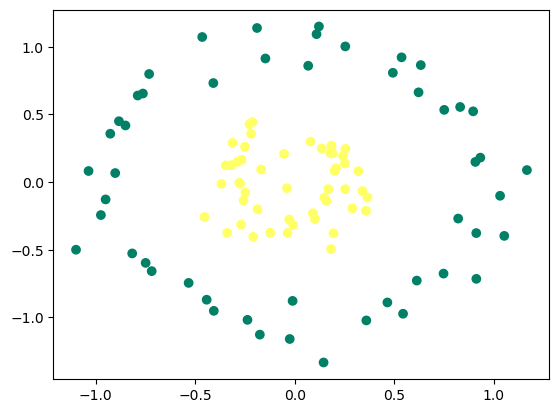

In [377]:
from sklearn.datasets import make_circles

X_train, y_train = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)

X_train_reshape = X_train.T
y_train_reshape = y_train.reshape((1, y_train.shape[0]))

print('dimensions de X:', X_train_reshape.shape)
print('dimensions de y:', y_train_reshape.shape)

plt.scatter(X_train_reshape[0, :], X_train_reshape[1, :], c=y_train_reshape, cmap='summer')
plt.show()

100%|██████████| 1000/1000 [00:00<00:00, 1788.76it/s]


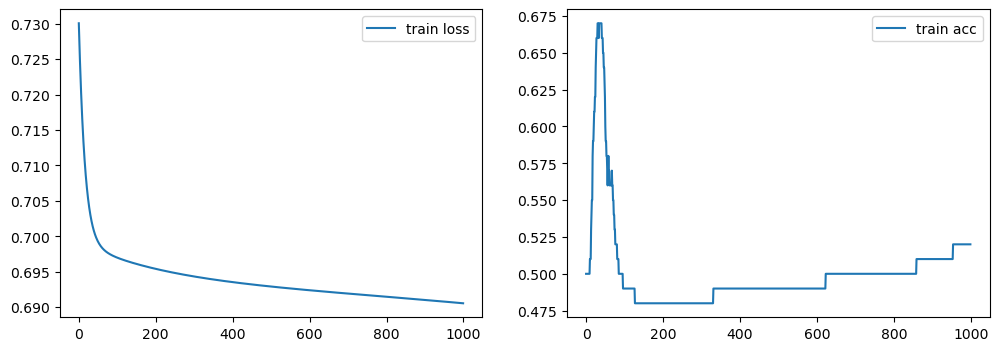

In [382]:
parameters = neural_network(X_train_reshape, y_train_reshape, n1=1, n_iter=1000, learning_rate=0.1)

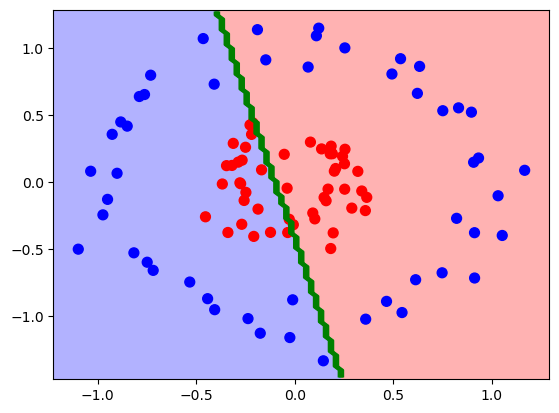

In [383]:
W1 = parameters['W1']
W2 = parameters['W2']
b1 = parameters['b1']

fig, ax = plt.subplots()
ax.scatter(X_train_reshape[0, :], X_train_reshape[1, :], c=y_train_reshape, cmap='bwr', s=50)

x1_lim = ax.get_xlim()
x2_lim = ax.get_ylim()

resolution = 100
x1 = np.linspace(x1_lim[0], x1_lim[1], resolution)
x2 = np.linspace(x2_lim[0], x2_lim[1], resolution)

#meshgrid
X1, X2 = np.meshgrid(x1, x2)

#assemblee (100, 100) => (1000, 2)
XX = np.vstack((X1.ravel(), X2.ravel()))

Z = predict(XX, parameters)
Z.shape

Z = Z.reshape((resolution, resolution))

ax.pcolormesh(X1, X2, Z, cmap='bwr', alpha=0.3, zorder=-1)
ax.contour(X1, X2, Z, colors='green')

# Démonstration Chien vs Chat

Alors une autre chose qu'on peut faire avec ce réseau de neurones, c'est de l'utiliser pour faire la distinction entre des photos de chats et de chiens.

Exactement comme ce qu'on avait cherché à faire dans la cinquième leçon. On n'avait pas vraiment eu de bons résultats car on avait simplement un modèle linéaire. 

Mais cette fois ci eh bien on peut faire l'expérience en rechargeant nos données donc on a des photos de 64 pixels par 64 pixels et on en a 20000 dans le train_set et 200 dans le test_set. 

In [406]:
from utilities import *

X_train, y_train, X_test, y_test = load_data()

print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(1000, 64, 64)
(1000, 1)
(200, 64, 64)
(200, 1)


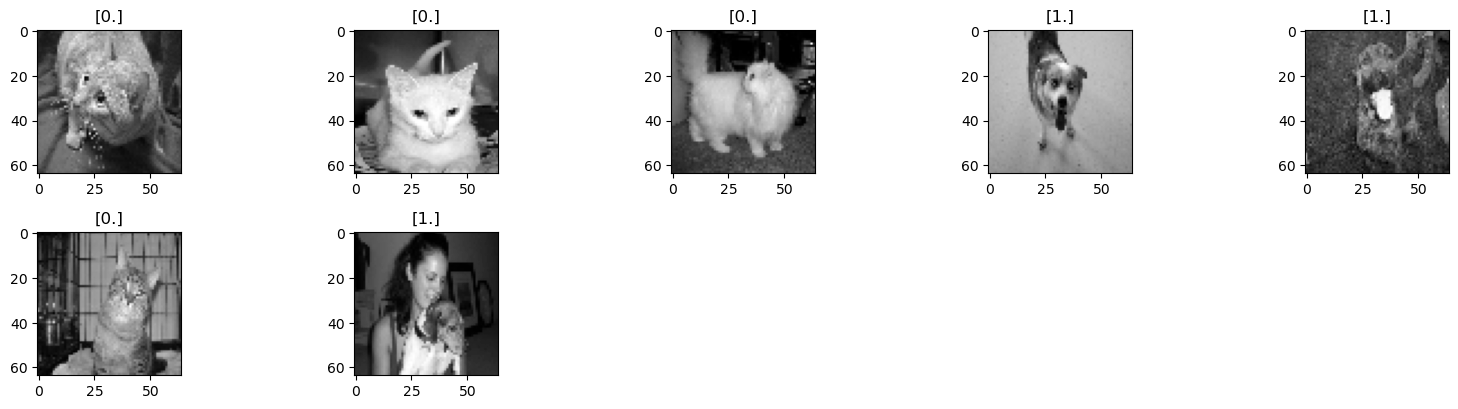

In [407]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
for i in range (1,8):
    plt.subplot(4,5,i)
    plt.imshow(X_train[i],cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [408]:
y_train = y_train.T
y_test = y_test.T

X_train = X_train.T
X_train_reshape = X_train.reshape(-1, X_train.shape[-1]) / X_train.max()

X_test = X_test.T
X_test_reshape = X_test.reshape(-1, X_test.shape[-1]) / X_test.max()

In [409]:
m_train = 300
m_test = 80

X_test_reshape = X_test_reshape[:, :m_test]
X_train_reshape = X_train_reshape[:, :m_train]
y_train = y_train[:, :m_train]
y_test = y_test[:, :m_test]

print(X_train_reshape.shape)
print(X_test_reshape.shape)
print(y_train.shape)
print(y_test.shape)

(4096, 300)
(4096, 80)
(1, 300)
(1, 80)


100%|██████████| 5000/5000 [01:57<00:00, 42.40it/s]


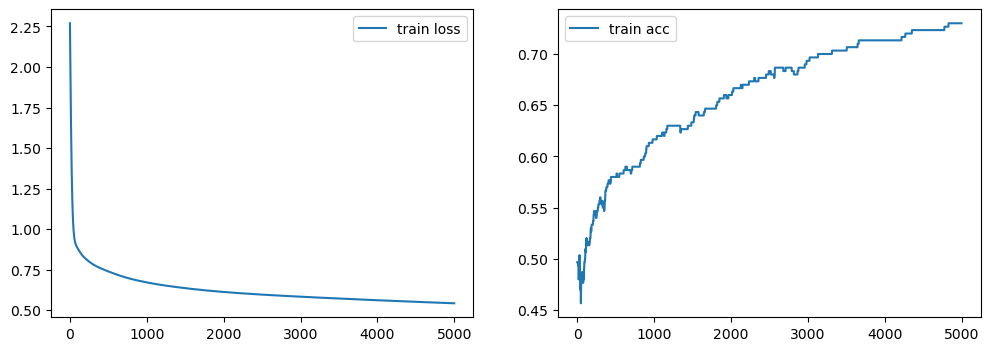

In [410]:
parametres1 = neural_network(X_train_reshape, y_train, n1=32, n_iter=5000, learning_rate=0.01)

C:\Users\romeofr\AppData\Local\Temp\ipykernel_25992\3003087397.py:27: UserWarning: No contour levels were found within the data range.
  ax.contour(X1, X2, Z, colors='green')


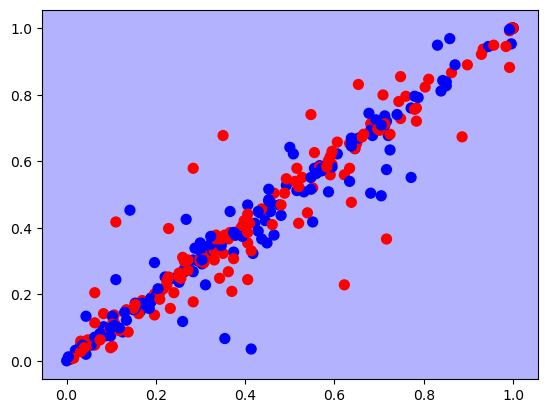

In [414]:
W1 = parameters['W1']
W2 = parameters['W2']
b1 = parameters['b1']

fig, ax = plt.subplots()
ax.scatter(X_train_reshape[0, :], X_train_reshape[1, :], c=y_train, cmap='bwr', s=50)

x1_lim = ax.get_xlim()
x2_lim = ax.get_ylim()

resolution = 100
x1 = np.linspace(x1_lim[0], x1_lim[1], resolution)
x2 = np.linspace(x2_lim[0], x2_lim[1], resolution)

#meshgrid
X1, X2 = np.meshgrid(x1, x2)

#assemblee (100, 100) => (1000, 2)
XX = np.vstack((X1.ravel(), X2.ravel()))

Z = predict(XX, parameters)
Z.shape

Z = Z.reshape((resolution, resolution))

ax.pcolormesh(X1, X2, Z, cmap='bwr', alpha=0.3, zorder=-1)
ax.contour(X1, X2, Z, colors='green')

# Réseau de neurones à L couches

In [ ]:
def visualisation(X, y, params):
    fig, ax = plt.subplots()
    ax.scatter(X[0, :], X[1, :], c=y, cmap='bwr', s=50)
    
    x0_lim = ax.get_xlim()
    x1_lim = ax.get_ylim()
    
    resolution = 100
    x0 = np.linspace(x0_lim[0], x0_lim[1], resolution)
    x1 = np.linspace(x1_lim[0], x1_lim[1], resolution)
    
    #meshgrid
    X0, X1 = np.meshgrid(x0, x1)

    #assemblee (100, 100) => (1000, 2)
    XX = np.vstack((X0.ravel(), X1.ravel()))

    Z = predict(XX, params)
    Z = Z.reshape((resolution, resolution))

    ax.pcolormesh(X0, X1, Z, cmap='bwr', alpha=0.3, zorder=-1)
    ax.contour(X0, X1, Z, colors='green')
    
    plt.show()

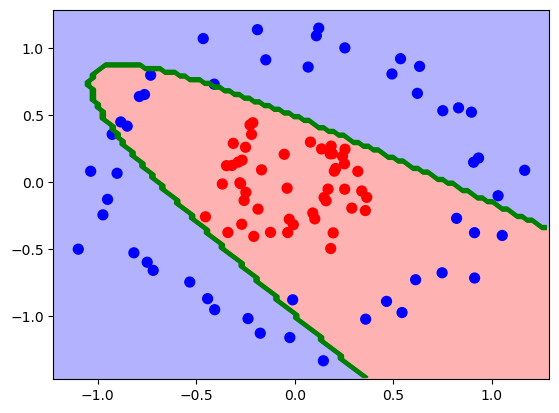

In [357]:
visualisation(X_train_reshape, y_train_reshape, parameters)

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

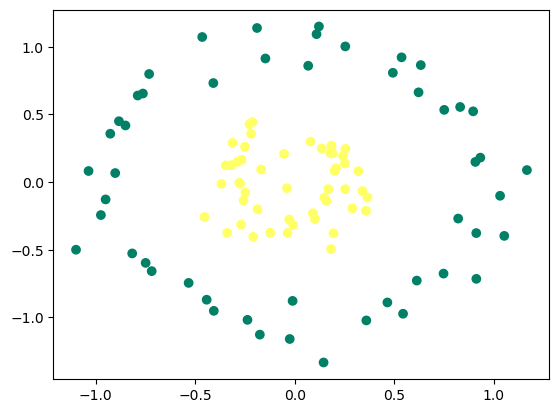

dimensions de X: (2, 100)
dimensions de y: (1, 100)


In [328]:
from sklearn.datasets import make_circles

X_train, y_train = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)

X_train_reshape = X_train.T
y_train_reshape = y_train.reshape((1, y_train.shape[0]))

plt.scatter(X_train_reshape[0, :], X_train_reshape[1, :], c=y_train_reshape, cmap='summer')
plt.show()

X = X_train_reshape
y = y_train_reshape

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

dimensions de X : (2, 100)
dimensions de y:  (1, 100)


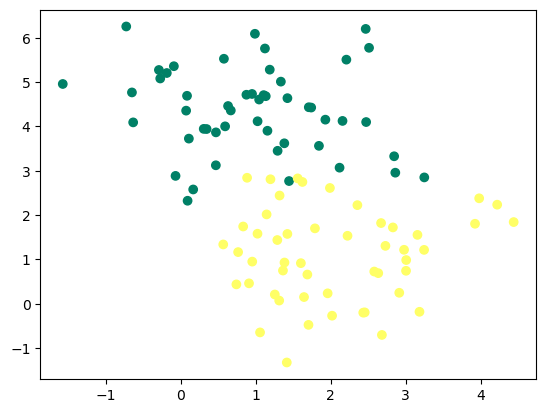

In [283]:
X, y = make_blobs(n_samples=100, n_features= 2, centers=2, random_state=0)
X=X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X :', X.shape)
print('dimensions de y: ', y.shape)

plt.scatter (X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

In [329]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [330]:
def derivative_sigmoid(x):
    return x * (1 - x)

In [331]:
def initialisation(layer_dims):
    #layers dims par ex = (X.shape[0], 32, 64, 64, 32 y.shape[0])
    
    params = {}
    
    L = len(layer_dims)
    
    for l in range (1 , L):
        params['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])
        params['b' + str(l)] = np.random.randn(layer_dims[l], 1)

    return params

In [332]:
##### TEST
params = initialisation((X.shape[0], 32, 64, 64, y.shape[0]))

for k,v in params.items():
    print(k, v.shape)
    

W1 (32, 2)
b1 (32, 1)
W2 (64, 32)
b2 (64, 1)
W3 (64, 64)
b3 (64, 1)
W4 (1, 64)
b4 (1, 1)


In [333]:
def forward_propagation(X, params):
    cache = {'A0': X}
    L = len(params) // 2
    
    for l in range (1, L+1):
        Z = params['W' + str(l)].dot(cache['A' + str(l-1)])
        cache['A' + str(l)] = sigmoid(Z)
    
    return cache

In [334]:
##### TEST
cache = forward_propagation (X, params)

for k,v in cache.items():
    print(k, v.shape)    

A0 (2, 100)
A1 (32, 100)
A2 (64, 100)
A3 (64, 100)
A4 (1, 100)


In [335]:
def compute_gradients(cache, y, params):

    m = y.shape[1]
    L = len(params) // 2
    
    
    dZ = cache['A' + str(L)] - y
    gradients = {}
    
    for l in reversed(range (1, L + 1)):
        gradients['dW' + str(l)] = 1/m * np.dot(dZ, cache['A' + str(l - 1)].T)
        gradients['db' + str(l)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
        dZ = np.dot(params['W' + str(l)].T, dZ) * derivative_sigmoid(cache['A' + str(l-1)])
    
    return gradients

In [336]:
##### TEST
gradients = compute_gradients (cache, y, params)

for k,v in gradients.items():
    print(k, v.shape)

dW4 (1, 64)
db4 (1, 1)
dW3 (64, 64)
db3 (64, 1)
dW2 (64, 32)
db2 (64, 1)
dW1 (32, 2)
db1 (32, 1)


In [337]:
def back_propagation(X, y,  params, cache, learning_rate):
    
    gradients = compute_gradients(cache, y, params)
    
    L = len(params) // 2
    for l in range (1, L+1):
        params['W' + str(l)] = params['W' + str(l)] - learning_rate * gradients['dW' + str(l)]
        params['b' + str(l)] = params['b' + str(l)] - learning_rate * gradients['db' + str(l)]
    
    return params        

In [338]:
def predict(X, params):
    cache = forward_propagation(X, params)
    L = len(params) // 2
    AL = cache['A' + str(L)]
    
    return AL >= 0.5

In [339]:
def visualisation(X, y, params):
    fig, ax = plt.subplots()
    ax.scatter(X[0, :], X[1, :], c=y, cmap='bwr', s=50)
    
    x0_lim = ax.get_xlim()
    x1_lim = ax.get_ylim()
    
    resolution = 100
    x0 = np.linspace(x0_lim[0], x0_lim[1], resolution)
    x1 = np.linspace(x1_lim[0], x1_lim[1], resolution)
    
    #meshgrid
    X0, X1 = np.meshgrid(x0, x1)

    #assemblee (100, 100) => (1000, 2)
    XX = np.vstack((X0.ravel(), X1.ravel()))

    Z = predict(XX, params)
    Z = Z.reshape((resolution, resolution))

    ax.pcolormesh(X0, X1, Z, cmap='bwr', alpha=0.3, zorder=-1)
    ax.contour(X0, X1, Z, colors='green')
    
    plt.show()

In [340]:
def neural_network(X, y, layer_dims, learning_rate=0.01, n_iter=1000):

    # initialisation parametres
    params = initialisation(layer_dims)
    
    # gradient descent
    for i in tqdm(range(n_iter)):
        cache = forward_propagation(X, params)
        params = back_propagation(X, y, params, cache, learning_rate)
    
    y_pred = predict(X, params)
    visualisation(X, y, params)
    

    return y_pred

100%|██████████| 10000/10000 [00:00<00:00, 10277.50it/s]


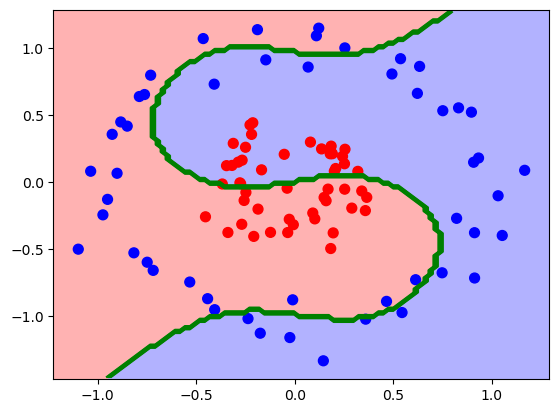

In [345]:
y_pred = neural_network(X, y, layer_dims=(X.shape[0], 2, y.shape[0]), n_iter=10000)